In [1]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from sympy import * 
#from spring_damp import force_time, mass_damp_spring, ideal_actual, graphs
from spring_damp import graphs
import random
random.seed(49) 
#spring and damp error is 10% of the lowest range
#increment = 0.01
# no:- of masses is k then, no of spring and damp are multiples of K (5k, 10k etc:-)

k = graphs(time = 90, increment = 0.01, state= [0,0], force = sin, amplitude=1, omega=0.1,
            no_mass = 10, range_mass=[1,20], no_spring= 50, range_spring = [5.0, 30.1], 
            no_damp = 50, range_damp=[5.0, 30.1], uniform=1, delta_mass = 0, delta_spring=1, 
            delta_damp = 1)


In [2]:
a, b = [], []


In [ ]:
from sympy import *  
import numpy as np
time_array = np.arange(0, 90.01 , 0.01)
x, w = symbols('x w')
for i in range(time_array):
    x = 0.01
    w = 0.1 
    f = x * sin(w * i)
    

In [16]:
import yaml 
import sys 

with open('Human_Auto.yaml') as File:
    dic = yaml.load(File, Loader=yaml.FullLoader)
    a = dic['args_dict_h']
    for i, j in a.items():
        print(i + ' : ' + str(j))

amplitude : 1
omega : 0.1
no_mass : 10
range_mass : [1, 30]
no_spring : 50
range_spring : [1, 14.99]
no_damp : 50
range_damp : [1, 15.5]


In [12]:
from sympy import *

x = Symbol('x')
w = 0.1
a = 10
y = a * -cos(w*x)
dx = diff(y, x)
print(dx)
ddx = lambdify(x, dx) 
ddx(300)

1.0*sin(0.1*x)


-0.9880316240928618

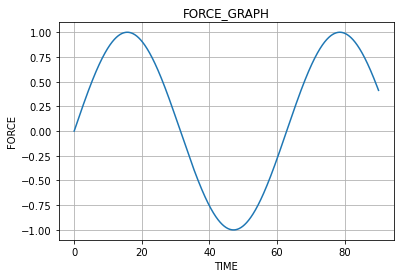

In [2]:
k.force_graph()

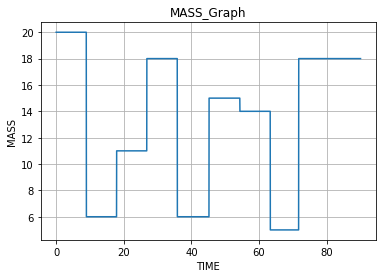

In [3]:
k.mass_graph()

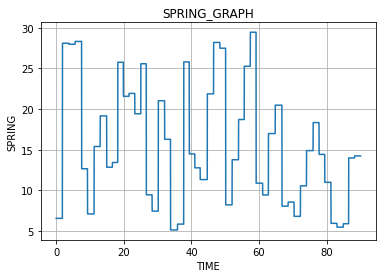

In [4]:
k.spring_graph()

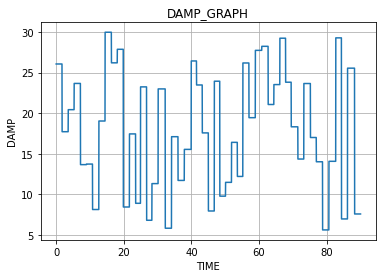

In [5]:
k.damp_graph()

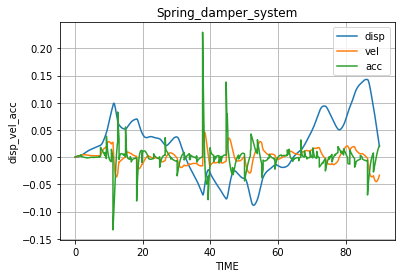

In [6]:
k.ideal_graph()

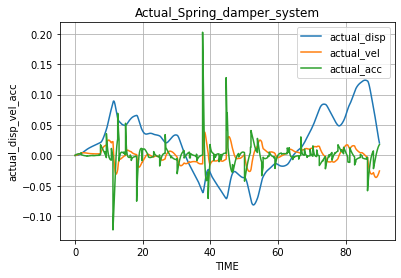

In [7]:
k.actual_graph()

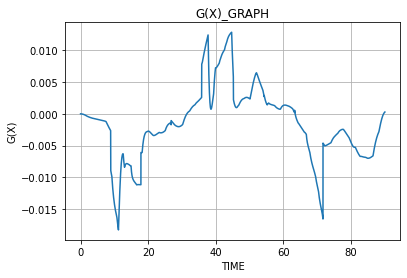

In [8]:
k.g_x()

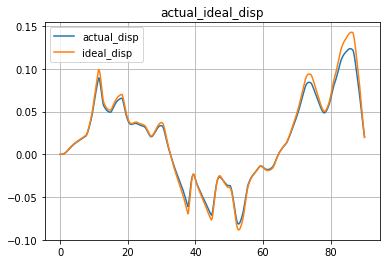

In [9]:
k.compare_disp()

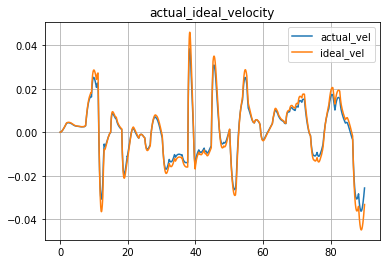

In [10]:
k.compare_vel()

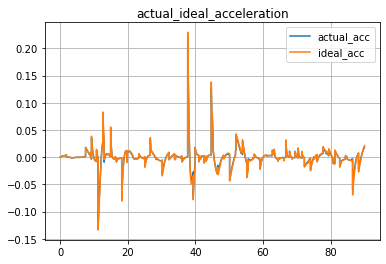

In [11]:
k.compare_acc()

In [20]:
df = k.actual_values_csv()
df.to_csv('sim_1.csv', index=False)

In [21]:
df

,time_step,Amplitude,Angular_Vel,force,mass,K,B,delta_mass,delta_K,delta_B,ideal_disp,ideal_vel,ideal_acc,actual_disp,actual_vel,actual_acc,G(x)
0,0.00,1,0.1,0.000000,20,6.551136,26.052981,0,1,1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.000000e+00
1,0.01,1,0.1,0.001000,20,6.551136,26.052981,0,1,1,1.684966e-13,1.374433e-09,0.000050,1.495658e-13,1.219789e-09,0.000050,-6.099692e-11
2,0.02,1,0.1,0.002000,20,6.551136,26.052981,0,1,1,2.541462e-09,5.213972e-07,0.000099,2.539368e-09,5.208781e-07,0.000099,-2.617087e-08
3,0.03,1,0.1,0.003000,20,6.551136,26.052981,0,1,1,1.324522e-08,1.510869e-06,0.000148,1.323553e-08,1.509724e-06,0.000148,-7.614796e-08
4,0.04,1,0.1,0.004000,20,6.551136,26.052981,0,1,1,3.628183e-08,3.001306e-06,0.000196,3.620790e-08,2.958912e-06,0.000196,-1.497560e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,89.96,1,0.1,0.415760,18,14.235413,7.598909,0,1,1,2.113747e-02,-3.406562e-02,0.020762,2.148086e-02,-2.633276e-02,0.017496,2.695498e-04
8997,89.97,1,0.1,0.414850,18,14.235413,7.598909,0,1,1,2.079786e-02,-3.385709e-02,0.020892,2.121841e-02,-2.615714e-02,0.017583,2.743741e-04
8998,89.98,1,0.1,0.413940,18,14.235413,7.598909,0,1,1,2.046033e-02,-3.364733e-02,0.021020,2.095772e-02,-2.598070e-02,0.017669,2.790544e-04
8999,89.99,1,0.1,0.413029,18,14.235413,7.598909,0,1,1,2.012491e-02,-3.343625e-02,0.021146,2.069880e-02,-2.580333e-02,0.017753,2.835853e-04


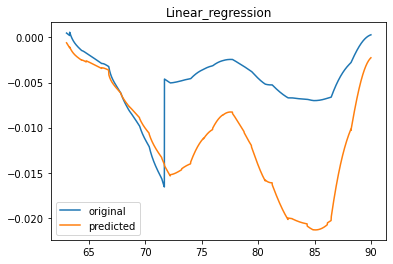

In [73]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 
import time 
import random 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt

#from spring_damp import spring_damp_mass

ss = StandardScaler()
lr = LinearRegression()
rfr = RandomForestRegressor(max_depth = 5, n_estimators=100,random_state = 0 )
etr = ExtraTreesRegressor(max_depth = 5, n_estimators = 100, random_state = 0)
gbr = GradientBoostingRegressor(random_state = 0)

df = pd.read_csv('sim_1.csv') 

imp_colums = ["time_step", "force", "mass", "K", "B","actual_disp", "actual_vel", "actual_acc", "G(x)"] 

for i in df.columns:
    if i not in imp_colums:
        df = df.drop([i], axis=1)

X_train = df.iloc[:6302, :8]
y_train = df.iloc[:6302, 8:]
X_test = df.iloc[6302:, :8]
y_test = df.iloc[6302:, 8:]

def compare(z1, title): 
    plt.plot(X_test['time_step'], y_test['G(x)'])
    plt.plot(X_test['time_step'], z1)
    plt.legend(['original', 'predicted'])
    plt.title(title)

lr.fit(X_train, y_train)
z1 = lr.predict(X_test) 
compare(z1, "Linear_regression")

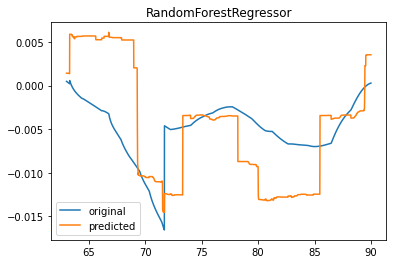

In [3]:
rfr.fit(X_train, y_train)
z1 = rfr.predict(X_test) 
compare(z1, "RandomForestRegressor")

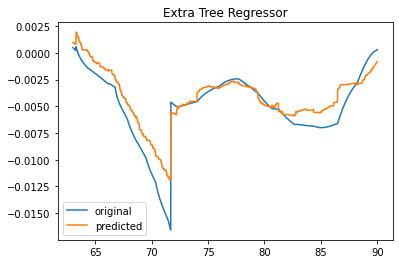

In [4]:
etr.fit(X_train, y_train)
z1 = etr.predict(X_test) 
compare(z1, "Extra Tree Regressor")

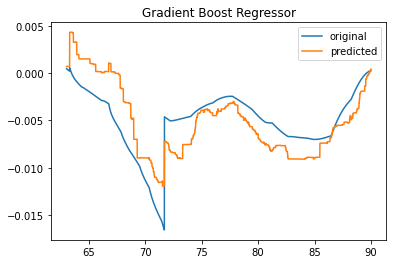

In [5]:
gbr.fit(X_train, y_train)
z1 = gbr.predict(X_test) 
compare(z1, "Gradient Boost Regressor")

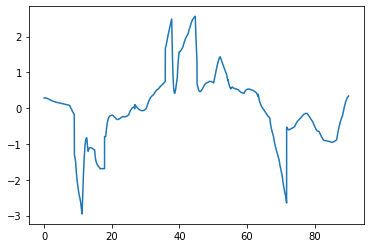

In [7]:
x_tr = ss.fit_transform(X_train)
x_te = ss.fit_transform(X_test) 
y_tr = ss.fit_transform(y_train)
y_te = ss.fit_transform(y_test) 

y = ss.fit_transform(np.array(df['G(x)']).reshape(-1,1))
plt.plot(df['time_step'], y) 

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0, (1e-1, 1e3) ) * RBF(10, (1e-3, 1e3))

gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.1) 

gpr.fit(x_tr, y_tr)
params = gpr.kernel_.get_params() 
mu_s, cov_s = gpr.predict(x_te, return_cov=True)

mu_s = mu_s.ravel()
std = 1.96 * np.sqrt(np.diag(cov_s))
plt.plot(X_test['time_step'], mu_s)
plt.plot(X_test['time_step'], y_te)
plt.fill_between(X_test['time_step'], mu_s + std, mu_s - std, alpha = 0.1)
plt.legend(["predicted", "original"]) 

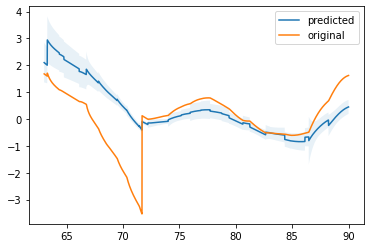

In [9]:
mu_s = mu_s.ravel()
std = 1.96 * np.sqrt(np.diag(cov_s))
plt.plot(X_test['time_step'], mu_s)
plt.plot(X_test['time_step'], y_te)
plt.fill_between(X_test['time_step'], mu_s + std, mu_s - std, alpha = 0.1)
plt.legend(["predicted", "original"]) 

In [58]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from sympy import * 
from spring_damp import graphs
import random
random.seed(49) 
#spring and damp error is 10% of the lowest range
#increment = 0.01
# no:- of masses is k then, no of spring and damp are multiples of K (5k, 10k etc:-)

# New simulation with less range in mass 

k = graphs(time = 90, increment = 0.01, state= [0,0], force = sin, amplitude=1, omega=0.1,
            no_mass = 10, range_mass=[1, 3], no_spring= 50, range_spring = [15.0, 30.1], 
            no_damp = 50, range_damp=[5.0, 30.1], uniform=1, delta_mass = 0, delta_spring=1, 
            delta_damp = 1)


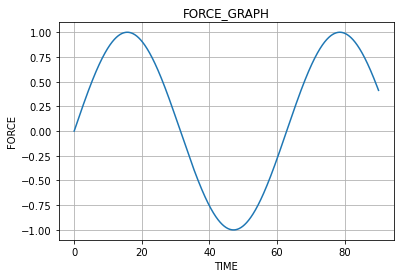

In [59]:
k.force_graph()

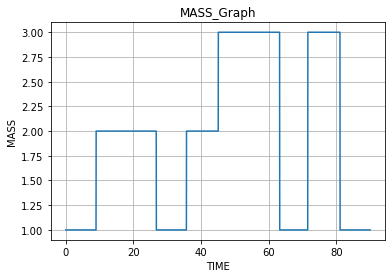

In [60]:
k.mass_graph()

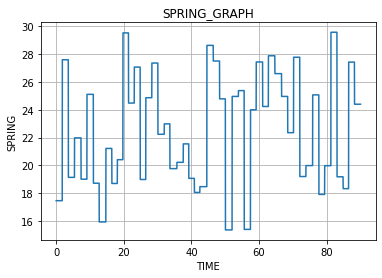

In [68]:
k.spring_graph()

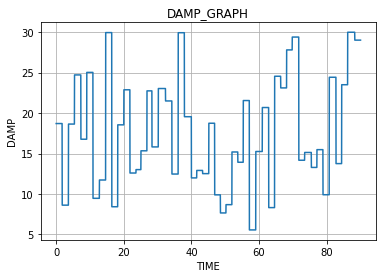

In [69]:
k.damp_graph()

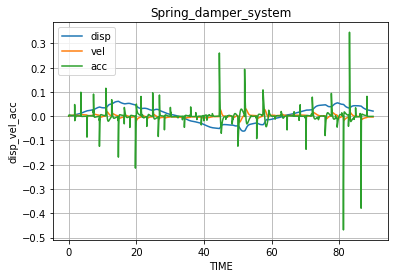

In [66]:
k.ideal_graph()

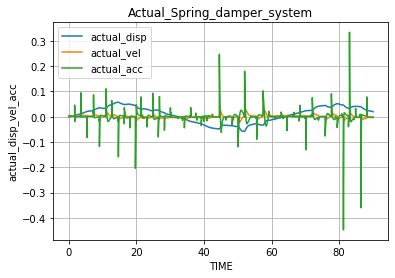

In [65]:
k.actual_graph()

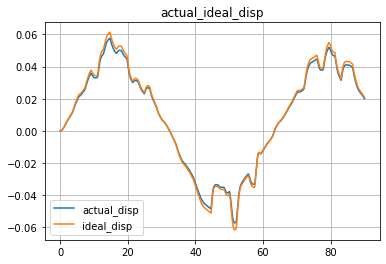

In [64]:
k.compare_disp()

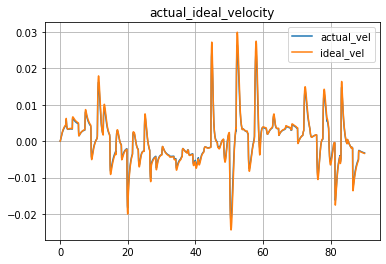

In [63]:
k.compare_vel()

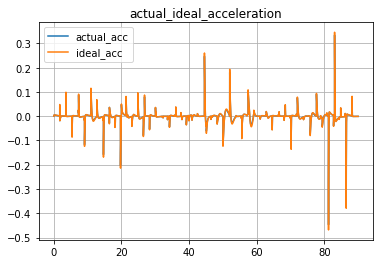

In [62]:
k.compare_acc()

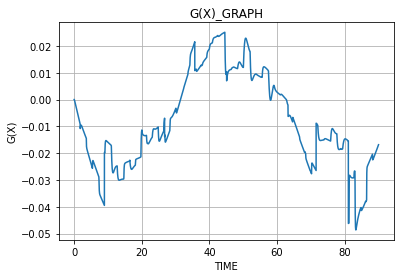

In [70]:
k.g_x()

In [71]:
df_2 = k.actual_values_csv()
df_2.to_csv('sim_2.csv', index=False)
df_2

,time_step,Amplitude,Angular_Vel,force,mass,K,B,delta_mass,delta_K,delta_B,ideal_disp,ideal_vel,ideal_acc,actual_disp,actual_vel,actual_acc,G(x)
0,0.00,1,0.1,0.000000,1,17.469447,18.702810,0,1,1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.000000e+00
1,0.01,1,0.1,0.001000,1,17.469447,18.702810,0,1,1,2.914613e-13,1.029481e-08,0.001000,2.734049e-13,9.654495e-09,0.001000,-9.654769e-09
2,0.02,1,0.1,0.002000,1,17.469447,18.702810,0,1,1,4.714220e-08,9.132377e-06,0.001828,4.698507e-08,9.086563e-06,0.001820,-9.133548e-06
3,0.03,1,0.1,0.003000,1,17.469447,18.702810,0,1,1,2.244109e-07,2.582236e-05,0.002513,2.230809e-07,2.560079e-05,0.002491,-2.582387e-05
4,0.04,1,0.1,0.004000,1,17.469447,18.702810,0,1,1,6.007837e-07,4.872463e-05,0.003078,5.958040e-07,4.817900e-05,0.003040,-4.877481e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,89.96,1,0.1,0.415760,1,24.402035,29.004552,0,1,1,2.106871e-02,-3.364174e-03,-0.000783,2.021330e-02,-3.230243e-03,-0.000777,-1.698306e-02
8997,89.97,1,0.1,0.414850,1,24.402035,29.004552,0,1,1,2.103505e-02,-3.367237e-03,-0.000783,2.018098e-02,-3.233274e-03,-0.000775,-1.694770e-02
8998,89.98,1,0.1,0.413940,1,24.402035,29.004552,0,1,1,2.100135e-02,-3.370269e-03,-0.000783,2.014862e-02,-3.236227e-03,-0.000774,-1.691239e-02
8999,89.99,1,0.1,0.413029,1,24.402035,29.004552,0,1,1,2.096763e-02,-3.373323e-03,-0.000782,2.011624e-02,-3.239173e-03,-0.000774,-1.687706e-02


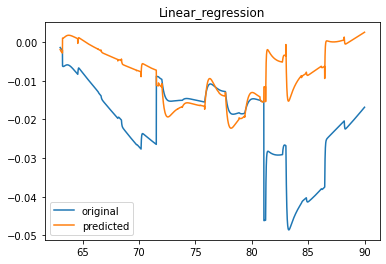

In [74]:
df_2 = pd.read_csv('sim_2.csv')

ss = StandardScaler()
lr = LinearRegression()
rfr = RandomForestRegressor(max_depth = 5, n_estimators=100,random_state = 0 )
etr = ExtraTreesRegressor(max_depth = 5, n_estimators = 100, random_state = 0)
gbr = GradientBoostingRegressor(random_state = 0)

for i in df_2.columns:
    if i not in imp_colums:
        df_2 = df_2.drop([i], axis=1)

X_train_2 = df_2.iloc[:6302, :8]
y_train_2 = df_2.iloc[:6302, 8:]
X_test_2 = df_2.iloc[6302:, :8]
y_test_2 = df_2.iloc[6302:, 8:]

def compare(z1, title): 
    plt.plot(X_test_2['time_step'], y_test_2['G(x)'])
    plt.plot(X_test_2['time_step'], z1)
    plt.legend(['original', 'predicted'])
    plt.title(title)

lr.fit(X_train_2, y_train_2)
z1 = lr.predict(X_test_2) 
compare(z1, "Linear_regression")

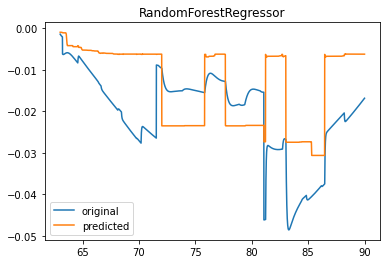

In [75]:
rfr.fit(X_train_2, y_train_2)
z1 = rfr.predict(X_test_2) 
compare(z1, "RandomForestRegressor")

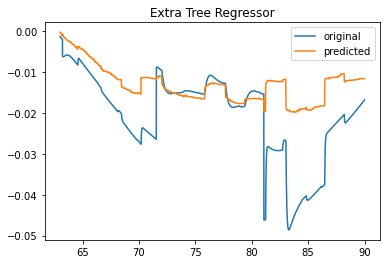

In [77]:
etr.fit(X_train_2, y_train_2)
z1 = etr.predict(X_test_2) 
compare(z1, "Extra Tree Regressor") 

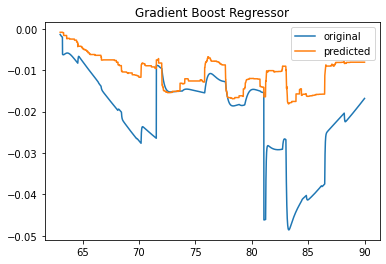

In [78]:
gbr.fit(X_train_2, y_train_2)
z1 = gbr.predict(X_test_2) 
compare(z1, "Gradient Boost Regressor")

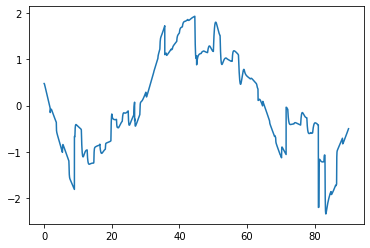

In [80]:
x_tr = ss.fit_transform(X_train_2)
x_te = ss.fit_transform(X_test_2) 
y_tr = ss.fit_transform(y_train_2)
y_te = ss.fit_transform(y_test_2) 

y_2 = ss.fit_transform(np.array(df_2['G(x)']).reshape(-1,1))
plt.plot(df_2['time_step'], y_2) 

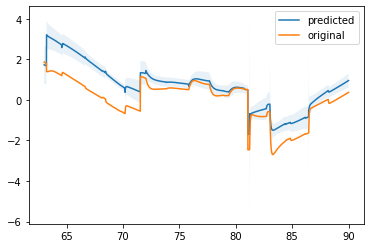

In [82]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0, (1e-1, 1e3) ) * RBF(10, (1e-3, 1e3))

gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.1) 

gpr.fit(x_tr, y_tr)
params = gpr.kernel_.get_params() 
mu_s, cov_s = gpr.predict(x_te, return_cov=True)

mu_s = mu_s.ravel()
std = 1.96 * np.sqrt(np.diag(cov_s))
plt.plot(X_test_2['time_step'], mu_s)
plt.plot(X_test_2['time_step'], y_te)
plt.fill_between(X_test_2['time_step'], mu_s + std, mu_s - std, alpha = 0.1)
plt.legend(["predicted", "original"]) 